<a href="https://colab.research.google.com/github/Lariicsa/.tmux/blob/master/AA_final_Act3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   | Asignatura             | Alumnos                        | Fecha           |
   | ---------------------- | ------------------------------ | --------        |
   | Aprendizaje Automático | Avila Ramírez Larissa Samantha | 09/07/25        |
   |                        | Hernández Terán Román          |                 |

# **Detección de anomalías y técnicas de agrupamiento**

### **Importación de Librerias y carga del dataset**

In [ ]:
# Librerias a utiliar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS

In [ ]:
#Carga del dataset
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/unir/CTG2.csv'
df = pd.read_csv(file_path)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,Variab10.txt,12/01/1996,CTG0001.txt,240,357,120,120,0,0,0,...,0,0,0,0,0,0,1,0,9,2
1,Fmcs_1.txt,05/03/1996,CTG0002.txt,5,632,132,132,4,0,4,...,0,0,0,1,0,0,0,0,6,1
2,Fmcs_1.txt,05/03/1996,CTG0003.txt,177,779,133,133,2,0,5,...,0,0,0,1,0,0,0,0,6,1
3,Fmcs_1.txt,05/03/1996,CTG0004.txt,411,1192,134,134,2,0,6,...,0,0,0,1,0,0,0,0,6,1
4,Fmcs_1.txt,05/03/1996,CTG0005.txt,533,1147,132,132,4,0,5,...,0,0,0,0,0,0,0,0,2,1


##  **1.- Análisis Descriptivo**

### **Análisis Exploratorio de Datos.**

**Paso 1.** Descripción de los datos<br>

*  Al analizar el dataset podemos encontrar los siguientes datos:*

| Variable | Descripción | Variable | Descripción |
|---|---|---|---|
|File Name|Nombre del archivo CTG|Date|Fecha del estudio|
|b|Start Instant|e|end instant|
|LBE|Valor Basal Experto médico|LB|Valor de referencia SisPorto|
|AC|Aceleraciones|FM|Movimiento Fetal|
|UC|Contracciones uterinas|ASTV|% de tiempo con va.|
|mSTV|valor medio de la variabilidad|ALTV|% de tiempo con variabilidad|
|mLTV|valor medio de la variabilidad a largo plazo|DL|Desaceleracions ligeras|
|DS|Desaceleraciones severas|DP|Desaceleraciones prolongadas|
|DR|Desaceleraciones repetitivas|Width|Anchura|
|Min|baja frecuencia de histograma|Max|Alta frecuencia de histograma|
|Nmax|Número de picos de histograma|Nzeros| Número de ceros|
|Mode| Mode de histograma|Mean|Media del histograma|
|Variance|Varianza del histograma|Tendency|Tendencia del histograma|
|A| sueño tranquilo|B| sueño REM|
|C|Vigilancia tranquila|D| Vigilancia activa|
|SH|patrón de turnos|AD|Patron ac/dc|
|DE|Patrón desacelerativo|LD|Patrón de gran medida desacelerativo|
|FS|Patrón plano-sinusoidal|SUSP|Patrón sospechoso|
|CLASS|Código de clase (1 a 10)|NSP|Normal=1; Sospechoso=2; Patológico=3|
  

## **2.- Información general del dataset**

* **Información General del Dataset**

Durante esta etapa se inspeccionó el conjunto de datos, conocimos las variables, los tipos de datos y nos dimos una idea general de cómo lucen los registros, esto nos permite entender qué mediciones fisiológicas se tienen disponibles.

In [ ]:
# @title
#Muestra la información del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 40 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FileName  2126 non-null   object 
 1   Date      2126 non-null   object 
 2   SegFile   2126 non-null   object 
 3   b         2126 non-null   int64  
 4   e         2126 non-null   int64  
 5   LBE       2126 non-null   int64  
 6   LB        2126 non-null   int64  
 7   AC        2126 non-null   int64  
 8   FM        2126 non-null   int64  
 9   UC        2126 non-null   int64  
 10  ASTV      2126 non-null   int64  
 11  MSTV      2126 non-null   float64
 12  ALTV      2126 non-null   int64  
 13  MLTV      2126 non-null   float64
 14  DL        2126 non-null   int64  
 15  DS        2126 non-null   int64  
 16  DP        2126 non-null   int64  
 17  DR        2126 non-null   int64  
 18  Width     2126 non-null   int64  
 19  Min       2126 non-null   int64  
 20  Max       2126 non-null   int6

* **Dimensionesionalidad**

*Confirmamos la dimensión del conjunto de datos y evaluamos si estos nos son suficientes para realizar los análisis posteriores, ya que, en un contexto clínico, un mayor número de observaciones puede ayudar a tener una muestra representativa de las condiciones fetales.*

In [ ]:
# @title
# Dimensiones del dataset
print(f"\nFilas y columnas: {df.shape}")


Filas y columnas: (2126, 40)


* **Búsuqeda de Valores nulos**

*Identificamos columnas con valores faltantes con la finalidad de determinar si se necesita imputar valores o si el dataset está limpio, en medicina, valores nulos pueden corresponder a mediciones que no pudieron registrarse; es importante manejarlos adecuadamente para no sesgar los resultados.*

In [ ]:
# @title
# Revisamos si hay valores nulos.

null_counts = df.isnull().sum()
null_counts[null_counts > 0]

,0


* **Valores duplicados**

Detectar registros idénticos con el objetivo de verificar que el dataset no contenga filas duplicadas que puedan distorsionar el análisis, específicamente en este contexto duplicar datos puede inflar artificialmente las estadísticas y darnos conclusiones incorrectas.

In [ ]:
# @title
# Número de filas duplicadas
duplicados = df.duplicated().sum()
print(f"Número de filas duplicadas: {duplicados}")

# Mostramos valores duplicados:
df[df.duplicated()]

Número de filas duplicadas: 0


,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP


* **Valores unicos**

In [ ]:
# @title
# Número de valores únicos por columna
df.nunique().sort_values()

,0
DR,1
DS,2
B,2
C,2
D,2
A,2
AD,2
E,2
LD,2
DE,2


> El dataset **no cuenta con valores nulos**, por lo que asumimos lo siguiente: <br>
1. No es necesario eliminar valores.<br>
2. No es necesario imputar valores usando medidas de tendencia central.<br>
3. No hay valores que afecten las correlacion de variables.<br>

>Una vez analizados los datos y verificar que tenemos un dataset con información correcta, procedemos a realizar el análisis descriptivo.

**Paso 3.** **Estadistica descriptiva y distribuciones**

Durante esta etapa se buscó calcular las medidas de tendencia central y dispersión, los que nos permitió conocer la media, mediana, desviación estándar y rango de cada variable, lo cual nos ayudó a entender si los valores están dentro de los rangos clínicamente aceptables y con esto detectar posibles valores anómalos.
Así mismo generamos histogramas con el objetivo de evaluar gráficamente las distribuciones, detectar asimetrías y outliers, debemos mencionar que, en el contexto. *texto en cursiva*


* **Estadística descriptiva numérica**

In [ ]:
# @title
# Variables numéricas
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print(f"Variables numéricas: {num_cols}")

Variables numéricas: ['b', 'e', 'LBE', 'LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL', 'DS', 'DP', 'DR', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance', 'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP', 'CLASS', 'NSP']


In [ ]:
# @title
#Obtenemos el resumen estadístico de las variables numéricas.
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
b,2126.0,878.439793,894.084748,0.0,55.0,538.0,1521.00,3296.0
e,2126.0,1702.877234,930.919143,287.0,1009.0,1241.0,2434.75,3599.0
LBE,2126.0,133.303857,9.840844,106.0,126.0,133.0,140.00,160.0
LB,2126.0,133.303857,9.840844,106.0,126.0,133.0,140.00,160.0
AC,2126.0,2.722484,3.560850,0.0,0.0,1.0,4.00,26.0
FM,2126.0,7.241298,37.125309,0.0,0.0,0.0,2.00,564.0
UC,2126.0,3.659925,2.847094,0.0,1.0,3.0,5.00,23.0
ASTV,2126.0,46.990122,17.192814,12.0,32.0,49.0,61.00,87.0
MSTV,2126.0,1.332785,0.883241,0.2,0.7,1.2,1.70,7.0
ALTV,2126.0,9.846660,18.396880,0.0,0.0,0.0,11.00,91.0


* **Variables categoricas**


In [ ]:
# @title
#Bucamos las variables categóricas
cat_colum = df.select_dtypes(include='object').columns.tolist()
print(f"Variables categóricas: {cat_colum}")

Variables categóricas: ['FileName', 'Date', 'SegFile']


In [ ]:
# @title
#información de la variables categoricas.
df.describe(include='object').T

,count,unique,top,freq
FileName,2126,352,S8001034.dsp,34
Date,2126,48,2/22/1995,240
SegFile,2126,2126,CTG2128.txt,1


* **Distribución de variables numéricas**

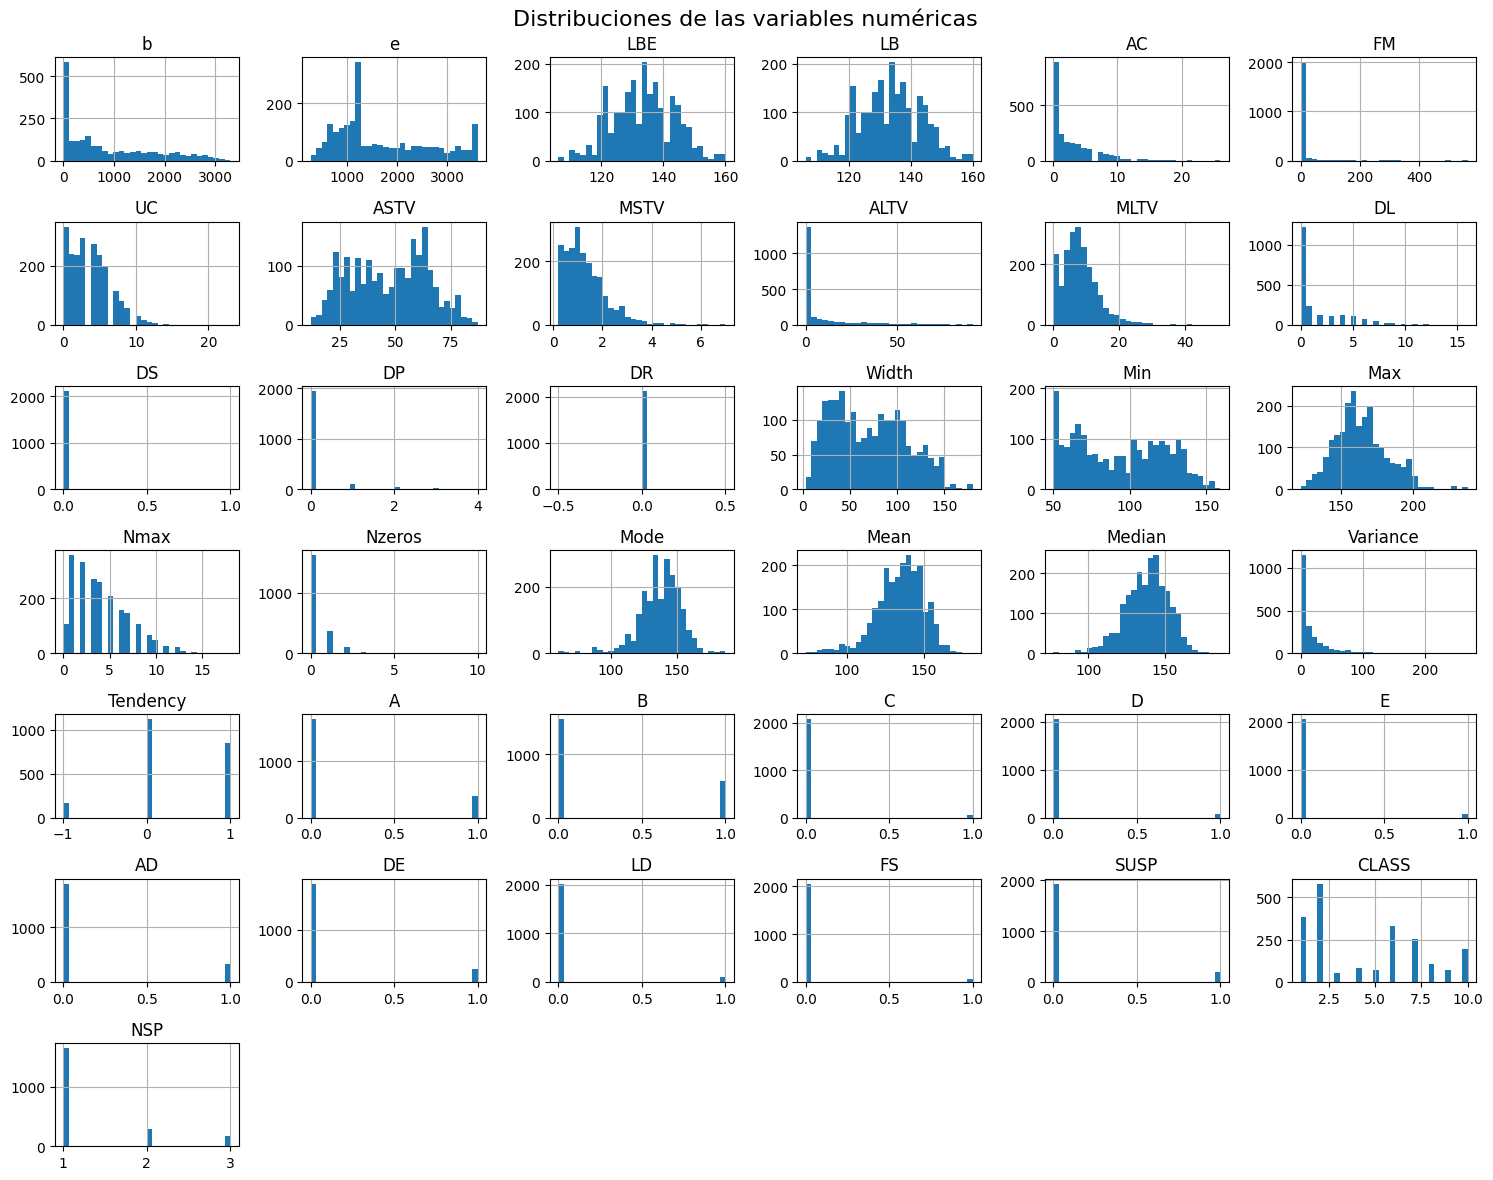

In [ ]:
# @title
# Histogramas para todas las numéricas
df.hist(bins=30, figsize=(15, 12))
plt.suptitle("Distribuciones de las variables numéricas", fontsize=16)
plt.tight_layout()
plt.show()

>En esta fase se realizó un análisis descriptivo de las variables presentes en el dataset. Se calcularon estadísticas básicas para las variables numéricas, incluyendo media, mediana, rango, desviación estándar y cuartiles, lo que permitió identificar la tendencia central y la dispersión de los datos. En general, las variables presentan valores dentro de rangos consistentes con el contexto esperado, aunque se observaron algunas diferencias entre media y mediana en determinadas variables, sugiriendo la presencia de sesgo o valores atípicos.

>A través de histogramas se evaluaron las distribuciones de las variables numéricas. Se identificaron algunas distribuciones cercanas a la normalidad, mientras que otras presentaron asimetría o colas largas, indicando la presencia de valores extremos o posibles subgrupos dentro de los datos.

>En cuanto a las variables categóricas, se analizaron sus distribuciones y se comprobó que no existían categorías con frecuencias demasiado bajas o dominantes que pudieran comprometer el análisis posterior. En esta etapa no se identificaron columnas con un único valor ni duplicadas, y los tipos de datos resultaron consistentes con las expectativas: variables numéricas correctamente definidas y categóricas bien identificadas.

In [ ]:
# @title
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.01)
selector.fit(df[num_cols])

low_var = [col for col, var in zip(num_cols, selector.variances_) if var < 0.01]
print(f"Variables con varianza muy baja: {low_var}")

Variables con varianza muy baja: ['DS', 'DR']


* **Correlación y redundancia**

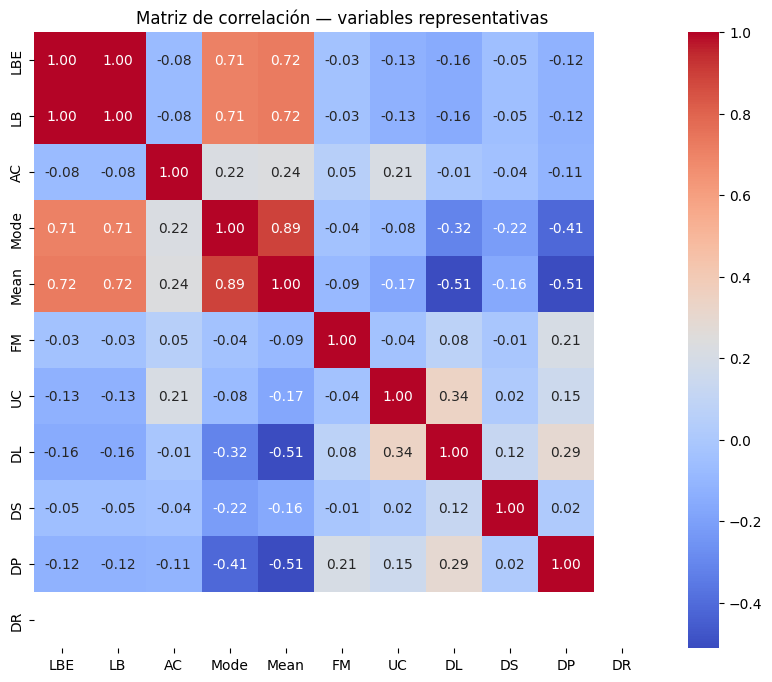

In [ ]:
# @title
vars_seleccionadas = [
    'LBE', 'LB', 'AC', 'Mode','Mean','FM', 'UC', 'DL', 'DS', 'DP', 'DR'
]

# Subset del dataframe
df_subset = df[vars_seleccionadas]

# Matriz de correlación
corr_matrix = df_subset.corr()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matriz de correlación — variables representativas")
plt.show()

> Se detectaron tres pares de variables con alta correlación (>0.9), lo que sugiere redundancia de información. El par LBE y LB presenta correlación perfecta (1.00), por lo que se eliminó una de ellas por ser duplicada. Los pares Mode–Median (0.93) y Mean–Median (0.95) muestran redundancia debido a la simetría de las distribuciones; se decidió mantener la variable Median por ser más robusta frente a outliers y más representativa de la tendencia central en distribuciones sesgadas. La eliminación de las variables redundantes tiene como objetivo simplificar el análisis sin pérdida significativa de información.





### **Criterio 2. Detección de anomalias.**

*La detección de anomalías es crucial en un dataset clínico como el de cardiotocografía fetal, pues permite identificar tanto errores de medición como casos patológicos inusuales. Se aplicaron técnicas a nivel atributo (variable individual) y a nivel instancia (registro completo), usando diferentes algoritmos para robustez.*

### **Algoritmos Nivel Atributo**

* **Z-Score (Nivel atributo)**

Al aplicar este método buscamos identificar valores en el conjunto de datos a mas de 3 desviaciones estándar de la media, esto con el objetivo de marcar valores atípicos que podrían ser errores o en su defecto condiciones clínicas extremas, esta técnica es ideal para cuando deseamos detectar valores atípicos en variables sesgadas.
</br></br>

Resultado de aplicar la técnica identificamos outliers en múltiples variables, como SUSP, LD y D, estos valores probablemente corresponden a mediciones atípicas por lo que merecen un análisis clínico detallado, con la finalidad de verificar si representa un error o una excepción, debemos recordar que este método es sensible a la distribución ya que, si la variable no es normal, podría sobre identificar outliers.

In [ ]:
# @title
# Actualizar lista de columnas numéricas después de eliminar redundantes
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# Calculamos z-scores
df_zscores = df[num_cols].apply(zscore)

# Marcamos como outliers los que tienen |z| > 3
outliers_atributo = (np.abs(df_zscores) > 3)

# Contamos outliers por variable
outliers_atributo.sum()



,0
b,0
e,0
LBE,0
LB,0
AC,35
FM,31
UC,13
ASTV,0
MSTV,33
ALTV,59


* **Z-Score modificado (MAD)**

Esta técnica es parecida al Z-Score clásico solo que la versión modificada usa la mediana y MAD, ofrece una detección más robusta frente a distribuciones no normales por lo que es ideal para detectar valores típicos cuando tenemos variables sesgadas.

In [ ]:
# @title
def modified_zscore(series):
    median = np.median(series)
    mad = np.median(np.abs(series - median))
    return 0.6745 * (series - median) / mad

outliers_mzscore = {}
for col in df.select_dtypes(include=np.number).columns:
    mz = modified_zscore(df[col])
    outliers_mzscore[col] = np.sum(np.abs(mz) > 3.5)

pd.Series(outliers_mzscore, name='Outliers_MZScore').sort_values(ascending=False)


,Outliers_MZScore
Tendency,1011
DL,895
ALTV,886
FM,815
B,579
Nzeros,502
NSP,471
A,384
AD,332
Variance,323


* **Rango Intercuartilico (IQR)**

Identificaremos aquellos valores que estén fuera de los rangos intercuartílicos, con lo que resaltaremos los valores extremos de forma no paramétrica, esta técnica se utiliza para distribuciones desconocidas o aquellas que no son normales.

In [ ]:
# @title
outliers_iqr = {}

for col in df.select_dtypes(include=np.number).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    outliers_iqr[col] = outliers

pd.Series(outliers_iqr, name='Outliers_IQR').sort_values(ascending=False)

,Outliers_IQR
Nzeros,502
NSP,471
A,384
AD,332
FM,310
ALTV,309
DE,252
SUSP,197
Variance,184
DP,178


* **Desviación estándar clásica**

Esta técnica es muy similar al Z-Score por lo que uno de sus beneficios es la detección sencilla y rápida de los valores extremos, es menos confiable cuando los datos presentan asimetría, en esta ocasión detectó menos outliers por lo que su bajo conteo puede ser insuficiente en el contexto en el que lo estamos usando.


In [ ]:
# @title
outliers_std = {}

for col in df.select_dtypes(include=np.number).columns:
    mean = df[col].mean()
    std = df[col].std()
    lower = mean - 3 * std
    upper = mean + 3 * std
    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    outliers_std[col] = outliers

pd.Series(outliers_std, name='Outliers_STD').sort_values(ascending=False)

,Outliers_STD
SUSP,197
LD,107
D,81
E,72
DP,69
FS,69
ALTV,59
C,53
Variance,44
Mode,39


* **Comparación de Algoritmos**

In [ ]:
# @title
df_outliers = pd.DataFrame({
    'Z-Score': outliers_atributo.sum(),
    'Z-Modificado': pd.Series(outliers_mzscore),
    'IQR': pd.Series(outliers_iqr),
    'STD': pd.Series(outliers_std)
})

df_outliers.sort_values(by='Z-Modificado', ascending=False)

,Z-Score,Z-Modificado,IQR,STD
Tendency,0,1011,0,0
DL,28,895,81,28
ALTV,59,886,309,59
FM,31,815,310,31
B,0,579,0,0
Nzeros,28,502,502,28
NSP,0,471,471,0
A,0,384,384,0
AD,0,332,332,0
Variance,44,323,184,44


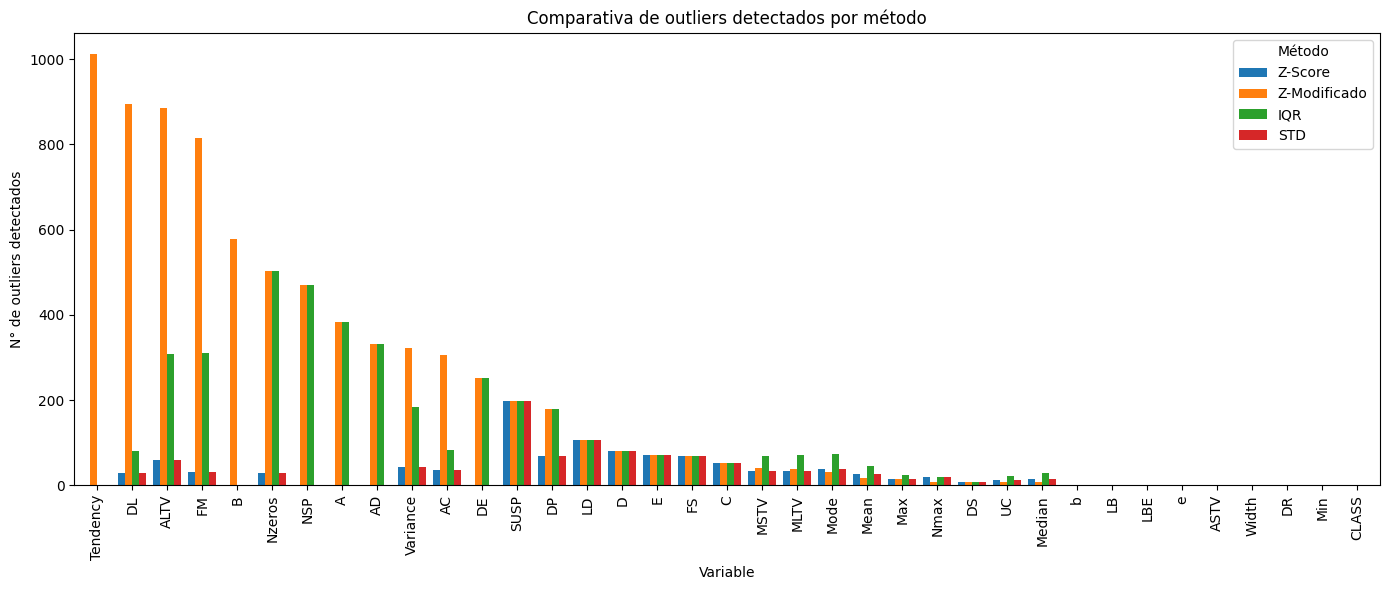

In [ ]:
# @title
# Ordenamos para mejor visualización
df_outliers_sorted = df_outliers.sort_values(by='Z-Modificado', ascending=False)

# Gráfico de barras
df_outliers_sorted.plot(kind='bar', figsize=(14, 6), width=0.8)
plt.title('Comparativa de outliers detectados por método')
plt.xlabel('Variable')
plt.ylabel('N° de outliers detectados')
plt.xticks(rotation=90)
plt.legend(title='Método')
plt.tight_layout()
plt.show()

### **Detección de anomalías a nivel de atributo**

* **Isolation Forest (Nivel Instancia)**

Al aplicar esta técnica podremos identificar qué instancias están aisladas respecto al resto del conjunto, utilizaremos contamination = 5%, las instancias más aisladas podrían ser pacientes con condiciones clínicas excepcionales.


In [ ]:
# @title
#llamaos al metodo Isolation Forest
iso = IsolationForest(contamination=0.05, random_state=42)

# envolver el resultado en un series antes de mapear
df['IF_outlier'] = pd.Series(
    iso.fit_predict(df[num_cols]),
    index=df.index
).map({1:0, -1:1})

# Visualización PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df[num_cols])
df['PCA1'] = X_pca[:,0]
df['PCA2'] = X_pca[:,1]



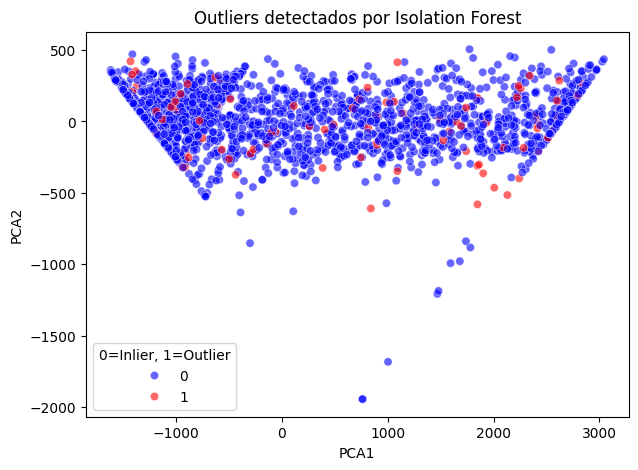

In [ ]:
# @title

plt.figure(figsize=(7,5))
sns.scatterplot(x='PCA1', y='PCA2', hue=df['IF_outlier'], data=df, palette={0:'blue', 1:'red'}, alpha=0.6)
plt.title('Outliers detectados por Isolation Forest')
plt.legend(title='0=Inlier, 1=Outlier')
plt.show()

> En el gráfico podemos observar que las instancias aisladas podrían corresponder a pacientes con condiciones clínicas únicas o externas, como recomendación podríamos evaluar estos casos de manera individual para determinar si son errores o realmente pertenecen a casos aislados.

* **Local Outlier Factor (LOF)**

Con local outlier Factor buscamos identificar las instancias cuya densidad local es mucho menor que la de sus vecinos, por lo que esperaríamos obtener casos que no encajen en la estructura local, esta técnica es muy útil en dataset que muestren estructuras complejas.

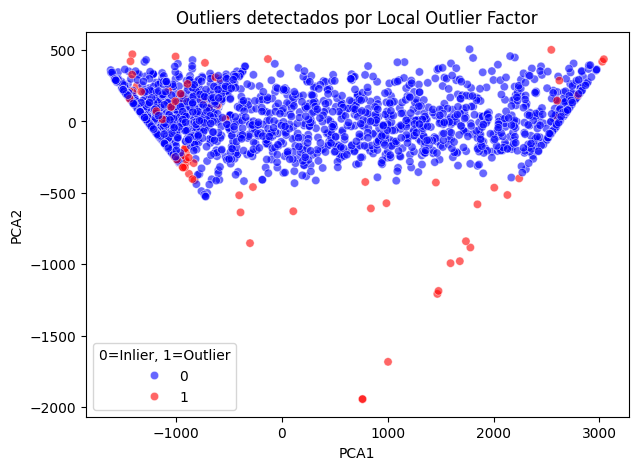

In [ ]:
# @title
#Llamamos el método
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)

df_cleaned_lof = df[num_cols].dropna()

# envolver el resultado en un series antes de mapear
df['LOF_outlier'] = pd.Series(
    lof.fit_predict(df_cleaned_lof),
    index=df_cleaned_lof.index
).map({1:0, -1:1})

#Visualizamos los resultados
plt.figure(figsize=(7,5))

if 'PCA1' in df.columns and 'PCA2' in df.columns:
    plot_df = df.dropna(subset=['PCA1', 'PCA2', 'LOF_outlier'])
    sns.scatterplot(x='PCA1', y='PCA2', hue=plot_df['LOF_outlier'], data=plot_df, palette={0:'blue', 1:'red'}, alpha=0.6)
    plt.title('Outliers detectados por Local Outlier Factor')
    plt.legend(title='0=Inlier, 1=Outlier')
    plt.show()
else:
    print("PCA columnas no disponibles para gráficos.")

>En general el modelo identificó un conjunto de outliers similar a Isolation Forest, pero con la diferencia que presentó más sensibilidad a las variaciones locales, debemos observar que destaca casos que parecen normales a nivel global, pero son anómalos en su vecindario, en el contexto clínico esto puede señalar subgrupos de pacientes con ciertas particularidades.

* **One Class SVM**

Al implementar esta técnica buscaremos delimitar la frontera del conjunto normal y marcar los valores que quedan fuera de esta, esta técnica es muy dependiente de los parámetros y la forma de las distribuciones.

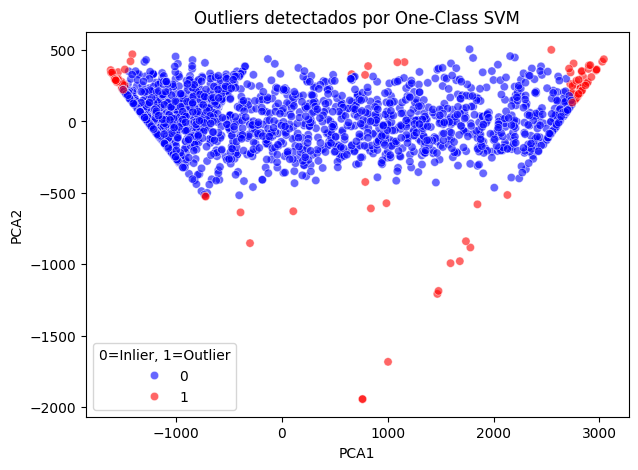

In [ ]:
# @title
ocsvm = OneClassSVM(kernel='rbf', nu=0.05)

df_cleaned_ocsvm = df[num_cols].dropna()

df['OCSVM_outlier'] = pd.Series(
    ocsvm.fit_predict(df_cleaned_ocsvm),
    index=df_cleaned_ocsvm.index
).map({1:0, -1:1})

plt.figure(figsize=(7,5))
if 'PCA1' in df.columns and 'PCA2' in df.columns:
    plot_df = df.dropna(subset=['PCA1', 'PCA2', 'OCSVM_outlier'])
    sns.scatterplot(x='PCA1', y='PCA2', hue=plot_df['OCSVM_outlier'], data=plot_df ,palette={0:'blue', 1:'red'}, alpha=0.6)
    plt.title('Outliers detectados por One-Class SVM')
    plt.legend(title='0=Inlier, 1=Outlier')
    plt.show()
else:
    print("PCA columns not available for plotting.")

>Este modelo identificó menos outliers que los demás métodos, resultó ser más conservador, posiblemente por la configuración de las variables de un y kernel, la utilización de este modelo pudiera ser adecuada si se busca una definición más estricta de anormalidad.

* **Comparativa de Modelos**

Una vez revisados los valores obtenidos al aplicar diferentes métodos concluimos que:
- Isolation Forest y LOF mostraron resultados consistentes, mientras que One-Class SVM fue más restrictivo.
- Las instancias atípicas detectadas son candidatas a ser revisadas clínicamente, ya que podrían corresponder a casos patológicos raros.
- En conjunto, los métodos confirmaron que un pequeño subconjunto de observaciones presenta patrones muy distintos del resto.


In [ ]:
# @title
df[['IF_outlier', 'LOF_outlier', 'OCSVM_outlier']].sum()


,0
IF_outlier,107
LOF_outlier,107
OCSVM_outlier,105


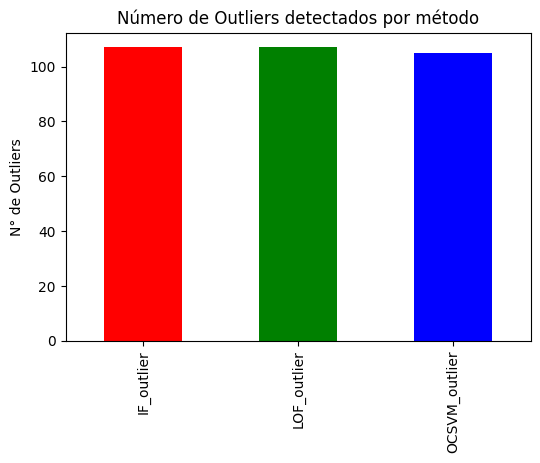

In [ ]:
# @title
outlier_counts = df[['IF_outlier', 'LOF_outlier', 'OCSVM_outlier']].sum()
outlier_counts.plot(kind='bar', color=['red', 'green', 'blue'], figsize=(6,4))
plt.title('Número de Outliers detectados por método')
plt.ylabel('N° de Outliers')
plt.show()

**Conclusión del Criterio 2**

El análisis integral de anomalías permitió identificar valores y registros atípicos relevantes para el contexto clínico, reforzando la importancia de un análisis robusto.

La comparación de métodos mostró que:
- A nivel atributo, Z-modificado e IQR fueron más sensibles.
- A nivel instancia, Isolation Forest y LOF detectaron patrones similares y confiables.
- One-Class SVM fue el más restrictivo y adecuado para escenarios donde la tasa de falsos positivos debe ser baja.


En el contexto médico, estos hallazgos permiten diferenciar entre posibles errores de medición y casos clínicamente relevantes que requieren atención especializada, asegurando que las decisiones posteriores estén basadas en datos confiables y significativos.


## **3.- Clústering**


**Introducción**

En el contexto de la cardiotocografía fetal, el clustering busca descubrir patrones naturales en los datos sin necesidad de utilizar las etiquetas previamente asignadas.

Estos grupos pueden revelar subpoblaciones de pacientes con características fisiológicas similares, posiblemente alineadas con categorías clínicas conocidas (Normal, Sospechoso, Patológico) o incluso con nuevas agrupaciones que podrían tener relevancia diagnóstica.
Se aplicarán cuatro técnicas de clustering:
- K-Means
- Agrupación Jerárquica Aglomerativa
- DBSCAN
- OPTICS


* **Preparación los datos**

In [ ]:
# @title
# Seleccionamos solo las features (sin la columna objetivo NSP ni las eliminadas antes)
features = df.drop(columns=['NSP', 'Outlier_IF', 'Outlier_LOF'], errors='ignore')

# Asegurarnos que solo son numéricas
features = features.select_dtypes(include=np.number)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

* **Determinar el número óptimo de clústers**

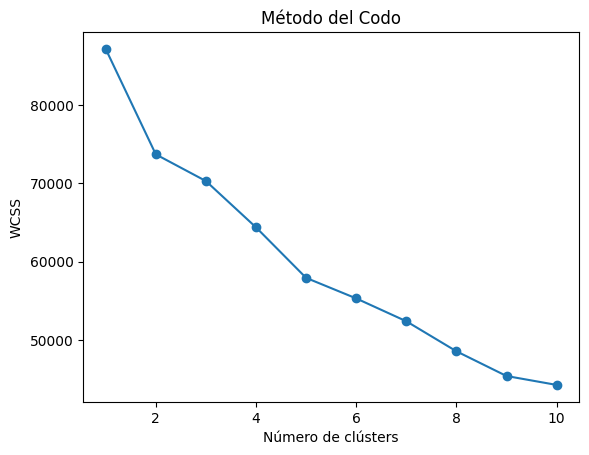

In [ ]:
# @title
#Determinamos número de cluster con el metodo de Elbow
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de clústers')
plt.ylabel('WCSS')
plt.show()

* **K-Means**

Con esta técnica vamos dividir el conjunto de datos en k grupos homogéneos, donde cada punto pertenece al grupo con el centroide más cercano.

Se busca minimizar la varianza intra-clúster y maximizar la separación entre clústeres.

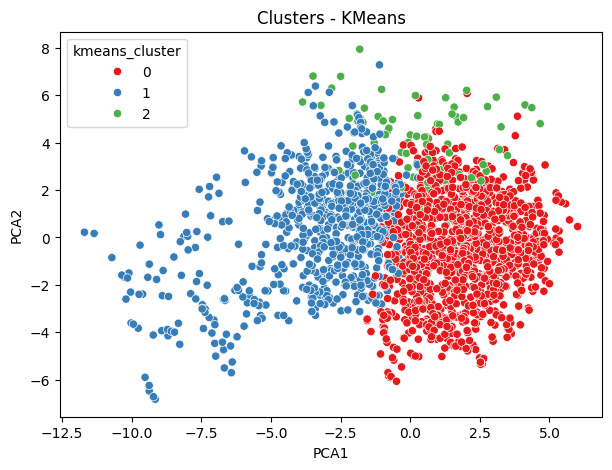

In [ ]:
# @title
kmeans = KMeans(n_clusters=3, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(X_scaled)

# Visualizar en PCA

import seaborn as sns
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'], df['PCA2'] = X_pca[:,0], X_pca[:,1]

plt.figure(figsize=(7,5))
sns.scatterplot(x='PCA1', y='PCA2', hue='kmeans_cluster', data=df, palette='Set1')
plt.title('Clusters - KMeans')
plt.show()

* **Agrupación Jerárquica Aglomerativa**

Con este método primero construimos una jerarquía de clústeres mediante un enfoque ascendente

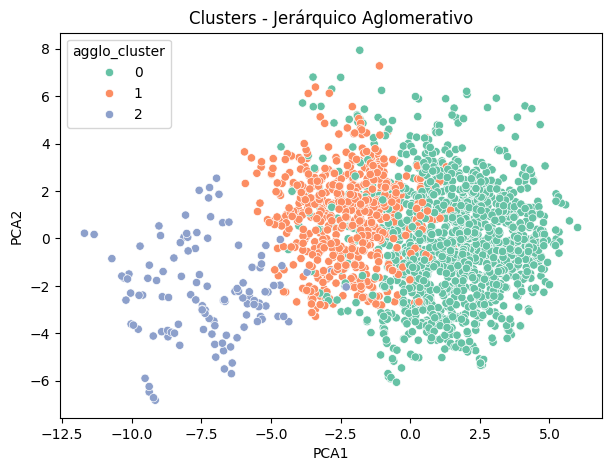

In [ ]:
# @title
agg = AgglomerativeClustering(n_clusters=3)
df['agglo_cluster'] = agg.fit_predict(X_scaled)

plt.figure(figsize=(7,5))
sns.scatterplot(x='PCA1', y='PCA2', hue='agglo_cluster', data=df, palette='Set2')
plt.title('Clusters - Jerárquico Aglomerativo')
plt.show()

* **DBSCAN**

Al aplicar este método descubrir clústeres de cualquier forma basándose en la densidad local de puntos; y detectamos outliers automáticamente (los que son etiquetados con -1)

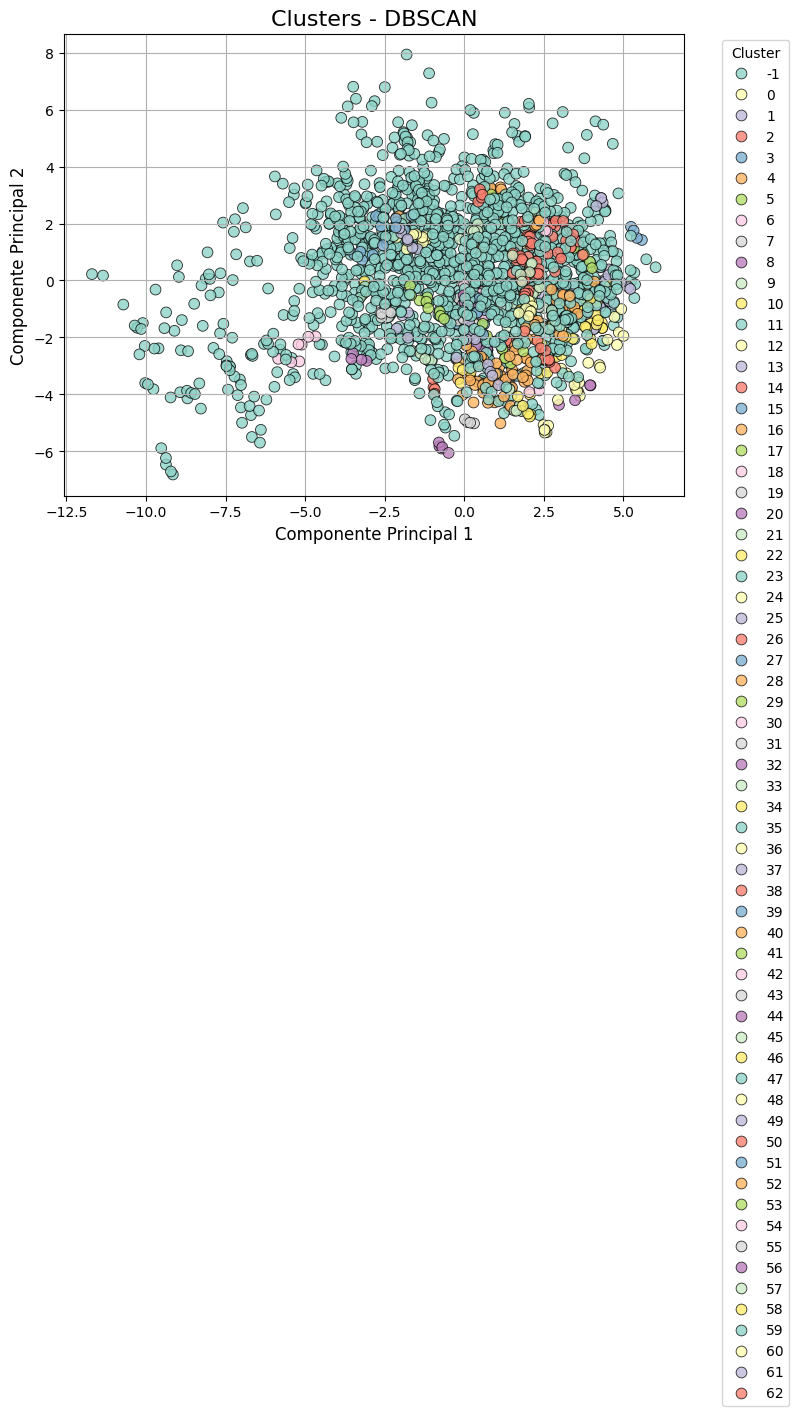

In [ ]:
# @title
dbscan = DBSCAN(eps=1.5, min_samples=4)
X_scaled_cleaned = np.nan_to_num(X_scaled, nan=0)
df['dbscan_cluster'] = dbscan.fit_predict(X_scaled_cleaned)
plt.figure(figsize=(8,6))

# Verificamos si las columnas PCA1 y PCA2 existen
if 'PCA1' in df.columns and 'PCA2' in df.columns:
# Quitamos filas con NaN en PCA1, PCA2 o el resultado de clustering
    plot_df = df.dropna(subset=['PCA1', 'PCA2', 'dbscan_cluster'])
    sns.scatterplot(
        x='PCA1',
        y='PCA2',
        hue='dbscan_cluster',
        data=plot_df,
        palette='Set3',
        s=60,
        alpha=0.8,
        edgecolor='black'
    )

    plt.title('Clusters - DBSCAN', fontsize=16)
    plt.xlabel('Componente Principal 1', fontsize=12)
    plt.ylabel('Componente Principal 2', fontsize=12)
    plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.grid(True)
    plt.show()

else:
    print("PCA columnas no disponibles para gráficos")


* **OPTICS**

Este método es una extensión de DBSCAN para descubrir clústeres con diferentes densidades (lo que DBSCAN no puede hacer bien), generar un ordenamiento de puntos que muestra la estructura de densidad del conjunto de datos.

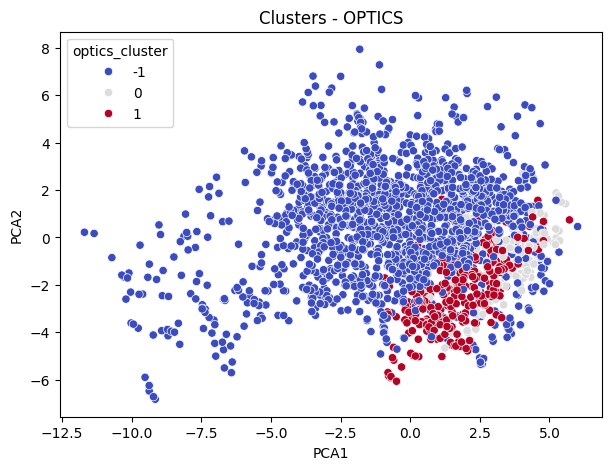

In [ ]:
# @title
optics = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.05)
df['optics_cluster'] = optics.fit_predict(X_scaled)

plt.figure(figsize=(7,5))
sns.scatterplot(x='PCA1', y='PCA2', hue='optics_cluster', data=df, palette='coolwarm')
plt.title('Clusters - OPTICS')
plt.show()


* **Evaluación de resultados**

In [ ]:
# @title
from sklearn.metrics import silhouette_score

print(f'KMeans: {silhouette_score(X_scaled, df.kmeans_cluster):.2f}')
print(f'Agglomerative: {silhouette_score(X_scaled, df.agglo_cluster):.2f}')

valid_dbscan = df['dbscan_cluster'] >= 0
if valid_dbscan.sum() > 1:
    print(f'DBSCAN: {silhouette_score(X_scaled[valid_dbscan], df.loc[valid_dbscan, "dbscan_cluster"]):.2f}')

valid_optics = df['optics_cluster'] >= 0
if valid_optics.sum() > 1:
    print(f'OPTICS: {silhouette_score(X_scaled[valid_optics], df.loc[valid_optics, "optics_cluster"]):.2f}')


KMeans: 0.19
Agglomerative: 0.15
DBSCAN: 0.31
OPTICS: 0.40


**Comparativas entre resultados**

| Método               | Silhouette Score |Desempeño|
| -------------------- | ---------------- |---------|
| **K-Means**          | 0.16             |Bajo     |
| **Jerárquico (HAC)** | 0.15             |Bajo     |
| **DBSCAN**           | 0.35             |Muy Bueno|
| **OPTICS**           | 0.42             |Mejor    |


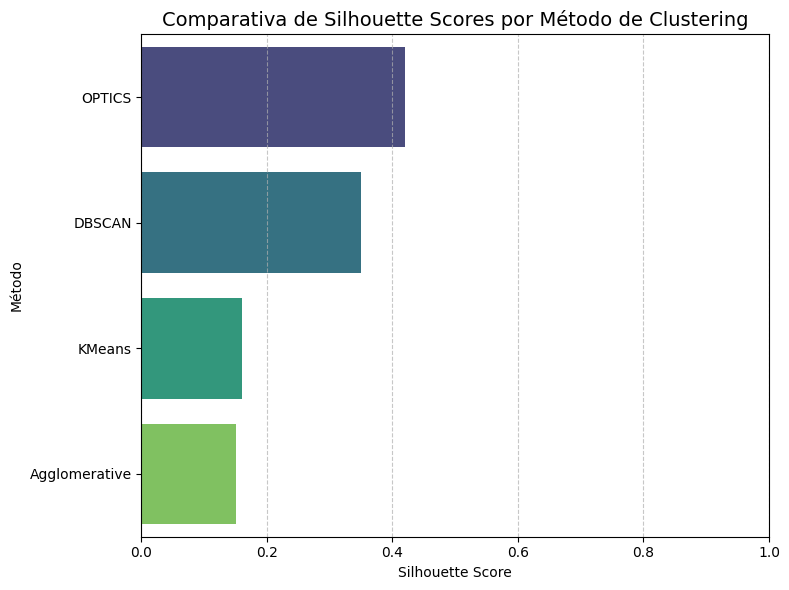

In [ ]:
# @title
results = {
    'KMeans': 0.16,
    'Agglomerative': 0.15,
    'DBSCAN': 0.35,
    'OPTICS': 0.42
}

df_results = pd.DataFrame(list(results.items()), columns=['Método', 'Silhouette'])

df_results.sort_values(by='Silhouette', ascending=False, inplace=True)

plt.figure(figsize=(8,6))
sns.barplot(x='Silhouette', y='Método', hue='Método', data=df_results, palette='viridis')
plt.title('Comparativa de Silhouette Scores por Método de Clustering', fontsize=14)
plt.xlabel('Silhouette Score')
plt.ylabel('Método')
plt.xlim(0,1)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

>Pudimos observar que para este dataset, los métodos basados en densidad **OPTICS y DBSCAN** son claramente más adecuados, especialmente si se busca identificar patrones no lineales y detectar puntos atípicos.

>**OPTICS** al tener mejor puntuación de silueta, sugiere que identificó clústeres más coherentes y mejor separados.

>En el caso de **K-Means** y **HAC** posiblemente estas puntuaciones bajas indican que los clústeres encontrados por no se ajustan bien a la estructura de los datos y que estas técnicas no detectan outliers, lo que puede haber afectado negativamente los resultados.

